In [1]:
import numpy as np
import pandas as pd

In [2]:
df_movies=pd.read_csv("./datasheet/netflix_titles.csv")
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Khám phá dữ liệu và tiền xử lý

Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
n_rows,n_cols=df_movies.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột.')

Dữ liệu có 7787 dòng và 12 cột.


Mỗi dòng là một bộ phim hoặc TV Show đã chiếu trên Netflix. Không có vấn đề mỗi dòng có ý nghĩa khác nhau.

## Kiểm tra lặp dữ liệu

In [4]:
assert(len(df_movies['show_id'].unique())==n_rows)

Ta thấy mỗi phim có một `show_id` khác nhau và số id khác nhau cũng bằng với số dòng nên không có trường hợp lặp dữ liệu.

## Ý nghĩa các cột
* `show_id`: Mã định danh của phim.
* `type`: Loại phim: phim truyền hình hay phim lẻ.
* `title`: Tên phim.
* `director`: Đạo diễn.
* `cast`: Diễn viên trong phim.
* `country`: Đất nước sản xuất.
* `date_added`: Ngày được thêm vào Netflix.
* `release_year`: Ngày phim được phát hành.
* `rating`: Đánh giá độ tuổi của phim.
* `duration`: Độ dài phim theo mùa hay theo phút.
* `listed_in`: Thể loại phim.
* `description`: Nội dung phim.

## Kiểu dữ liệu các cột

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Đa số có kiểu dữ liệu là string object. Một vài cột có giá trị null. Một vài cột cần tiền xử lý thêm:
* Chuyển date_added thành Datetime
* Chuyển cast thành mảng các diễn viên.
* Chuyển listed_in thành mảng hay onehot.
* Tách duration thành 2 cột: thời lượng phim và số mùa.

## Chuyển `data_added` thành Datetime

In [6]:
df_movies['date_added']=pd.to_datetime(df_movies['date_added'])
df_movies['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

## Chuyển cast thành mảng diễn viên

In [7]:
df_movies['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

Ta để ý tên diễn viên được cách nhau bởi `,_` (có khoảng trắng phía sau dấu ,)

In [8]:
df_movies['cast_array']=df_movies['cast'].apply(lambda x:str(x).split(", "))
df_movies['cast_array'].head()

0    [João Miguel, Bianca Comparato, Michel Gomes, ...
1    [Demián Bichir, Héctor Bonilla, Oscar Serrano,...
2    [Tedd Chan, Stella Chung, Henley Hii, Lawrence...
3    [Elijah Wood, John C. Reilly, Jennifer Connell...
4    [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...
Name: cast_array, dtype: object

## Xử lý listed_in

Đầu tiên ta phải thông kê có tất cả bao nhiêu thể loại phim

In [9]:
# Chuyển listed_in thành mảng
df_movies['listed_in_array']=df_movies['listed_in'].apply(lambda x:str(x).split(", "))
df_movies['listed_in_array'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: listed_in_array, dtype: object

Để kiểm tra các giá trị có thể có, ta cộng tất cả các mảng trên lại và lấy giá trị unique:

In [10]:
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

Có vẻ như nhiều thể loại phim chỉ khác nhau do có chữ TV phía trước: chẳng hạn như `Dramas` và `TV Dramas`. Ta đã có cột `type` cho biết loại phim rồi nên để thêm TV vào đây sẽ dư thừa. Chúng ta sẽ gộp các thể loại có chữ TV vào loại không có TV tương ứng (`TV Dramas` thành `Dramas`). Tuy nhiên trước khi làm điều này ta phải kiểm tra bảo đảm giả thiết chúng ta đưa ra là phù hợp. Cụ thể ta sẽ kiểm tra: 
* Có phải toàn bộ `TV Show` đều có chữ TV trong `list_in` không. Lưu ý là list_in chứa nhiều thể loại nên ta cần phải kiểm tra toàn bộ.

Mục đích của việc làm trên có thể giúp ích cho hệ thống recommendation sau này. Khi một người coi thể loại Thrillers thì chúng ta có thể không cần quan tâm Thrillers đó là movie hay là TV show.

### Loại bỏ từ TV khỏi một số thể loại

In [11]:
TV_show_count=len(df_movies[df_movies['type']=='TV Show'])
print(f'Có {TV_show_count} TV show.')

Có 2410 TV show.


In [12]:
#Ta tạo thêm m là lọc ra các dòng chỉ chứa TV show
m=df_movies[df_movies['type']=='TV Show']

In [13]:
#Số lượng phim có thể loại chứa chữ TV trong toàn bộ bảng
s1=sum(df_movies['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Có tổng cộng {s1} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


In [14]:
#Số lượng phim có thể loại chứa chữ TV trong các TV Show
s2=sum(m['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Trong số các TV show, có tổng cộng {s2} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Trong số các TV show, có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


Ta tính 2 lần như trên để đảm bảo rằng không có phim nào (Không phải TV Show) mà có chứa chữ TV trong thể loại. Trong số 2410 TV show có 2319 show có thể loại chứa chữ TV trong đó. Như vậy ta có thể an toàn xóa đi các chữ TV trong `listed_in_array`. Sau khi xóa xong chung ta vẫn biết phim đó có phải là TV show hay không nhờ vào cột `type`.

Tuy nhiên cần lưu ý một vài thể loại sẽ không có dạng không có chữ `TV` tương ứng. Ví dụ `Reality TV` sẽ không có thể loại `Reality` tương ứng.

Ta sẽ tạo ra một dict có dạng sau:
```
{
    'TV Dramas':'Dramas',
    'TV Action & Adventure':'Action & Adventure',
    ...
}
```

In [15]:
#Tạo ra array chứa thể loại có chữ TV
TV_listed=[a for a in listed_unique if a.find("TV")>=0]

#Array chứa thể loại có chữ TV sau khi xóa TV
TV_listed_remove=[a.replace("TV ","").replace("TV","") for a in TV_listed]

#Array chứa thể loại không có chữ TV
TV_listed_noTV=[a for a in listed_unique if a.find("TV")==-1]

#Danh sách các từ có thể thay thế
to_replace_list=list(set(TV_listed_remove).intersection(TV_listed_noTV))
to_replace_list

['Sci-Fi & Fantasy', 'Comedies', 'Action & Adventure', 'Dramas', 'Thrillers']

In [16]:
#Các từ ở trên nằm tại các vị trí sau:
id_to_replace=[item[0] for item in enumerate(TV_listed_remove) if item[1] in to_replace_list]
id_to_replace

[10, 11, 12, 15, 17]

In [17]:
#Các từ cần thay thế
to_replace=[TV_listed[i] for i in id_to_replace]
to_replace

['TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers']

In [18]:
#Tạo dict map từ cần thay thế và từ thay thế
replace_dict=dict((el,el.replace("TV ","")) for el in to_replace)
replace_dict

{'TV Action & Adventure': 'Action & Adventure',
 'TV Comedies': 'Comedies',
 'TV Dramas': 'Dramas',
 'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
 'TV Thrillers': 'Thrillers'}

In [19]:
#Tiến hành thay thế
df_movies['listed_in_array']=df_movies['listed_in_array'].apply(lambda x:[replace_dict.get(i,i) for i in x])

In [20]:
#Kiểm tra lại kết quả
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Horror', 'TV Mysteries', 'TV Shows', 'Teen TV Shows',
       'Thrillers'], dtype='<U28')

## One hot encoding listed_in_array
Ta đã tạo ra `listed_in_array` là mảng các thể loại của phim. Để dễ xử lý hơn ta sẽ chuyển thể loại này thành dang One hot. Mỗi thể loại sẽ có một cột riêng, phim nào thuộc thể loại nào sẽ có giá trị bằng 1 tại cột thể loại đó.

Code được tham khảo tại

https://stackoverflow.com/questions/52989660/pandas-python-how-to-one-hot-encode-a-column-that-contains-an-array-of-strings

In [21]:
df_movies=df_movies.join(pd.get_dummies(df_movies.listed_in_array.apply(pd.Series).stack()).sum(level=0))

In [22]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Horror,TV Mysteries,TV Shows,Teen TV Shows,Thrillers
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,...,0,0,0,0,0,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,...,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,...,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,...,0,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,...,0,0,0,0,0,0,0,0,0,0


Sau khi xử lý ta có thể khá nhiều cột.

## Xử lý cột duration
Cột duration có 2 đơn vị là season hoặc min. Giả thiết đưa ra là những dòng có đơn vị là season là TV show, đơn vị min là phim lẻ. Ta sẽ kiểm tra điều này bằng cách đếm giá trị như sau.

In [23]:
#Số lượng Movie và TV Show
df_movies['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [24]:
#Số lượng dòng với duration có chữ min:
df_movies['duration'].apply(lambda x:x.find("min")>=0).sum()

5377

Đều là 5377 nên giả thiết của chúng ta là đúng. Chúng ta sẽ tách cột duration thành `season` thể hiện số season và `min` thể hiện số phút của phim. Mục đích điều này có thể giúp ta xử lý dễ dàng hơn các thao tác như sort theo season, min trong tương lai.

In [25]:
df_movies['min']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("min")>=0)]
df_movies['season']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("Season")>=0)]

Ta cũng sẽ xóa chữ min và season(s) trên 2 cột ta mới tạo.

In [64]:
df_movies['min']=df_movies['min'].apply(lambda x:x[:-4] if pd.notnull(x) else np.nan)
df_movies['season']=df_movies['season'].apply(lambda x:x.replace('Seasons','').replace('Season','') if pd.notnull(x) else np.nan)

In [74]:
# Đổi kiểu dữ liệu thành số
#Float vì không bị lỗi khi chuyển NaN
df_movies['min']=df_movies['min'].astype('float') 
df_movies['season']=df_movies['season'].astype('float')

## Xử lý giá trị thiếu

Ta sẽ duyệt qua từng cột có giá trị thiếu và xem xét chúng ta có thể fill dữ liệu thiếu không. Sau khi xem xét thì thấy rằng các cột `director`,`cast`,`country` sẽ không thể fill được vì sẽ gây ra sai lệch lớn về mặt ý nghĩa trong dữ liệu. Ta chỉ có thể fill cho hai cột có dữ liệu thiếu là `date_added` và `rating`.

In [26]:
#Fill date_added bằng mean
df_movies['date_added']=df_movies['date_added'].fillna(df_movies['date_added'].mean())

#Fill rating bằng mode.
df_movies['rating']=df_movies['rating'].fillna(df_movies['rating'].mode())

## Phân bố các giá trị và kiểm tra bất thường

### Kiểm tra ngày tháng sản xuất và thêm vào

In [27]:
df_movies['date_added'].describe(datetime_is_numeric=True)

count                             7787
mean     2019-01-02 19:20:57.708627968
min                2008-01-01 00:00:00
25%                2018-02-01 00:00:00
50%                2019-03-07 00:00:00
75%                2020-01-17 12:00:00
max                2021-01-16 00:00:00
Name: date_added, dtype: object

Ngày phim được thêm vào Netflix ổn, không có gì bất thường. Phim cũ nhất vào năm 2008, mới nhất là 2021.

In [28]:
df_movies['release_year'].describe()

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Phim cũ nhất được sản xuất vào năm 1925.

Kiểm tra `release_year` < `date_added`. Ngày phim phát hành phải nhỏ hơn ngày phim được thêm vào Netflix.

In [29]:
release_larger_added=df_movies['release_year']>df_movies['date_added'].apply(lambda x:x.year)
(release_larger_added).sum()

12

Có 12 phim năm phát hành sau năm thêm vào Netflix. Có thể nào phim được Netflix thêm vào trước khi nó phát hành?

In [65]:
df_movies[release_larger_added].sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Horror,TV Mysteries,TV Shows,Teen TV Shows,Thrillers,min,season
7132,s7133,TV Show,Tokyo Trial,NaN,"Marcel Hensema, Paul Freeman, Irrfan Khan, Sta...","Canada, Japan, Netherlands",2016-12-13,2017,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,NaN,1
2311,s2312,TV Show,Fuller House,NaN,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,2019-12-06,2020,TV-PG,5 Seasons,...,0,0,0,0,0,0,0,0,NaN,5
2602,s2603,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2017-07-01,2018,TV-MA,86 min,...,0,1,0,0,0,0,0,0,86,NaN
1025,s1026,TV Show,BoJack Horseman,NaN,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2019-10-25,2020,TV-MA,6 Seasons,...,0,0,0,0,0,0,0,0,NaN,6
6462,s6463,TV Show,The Hook Up Plan,NaN,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2019-10-11,2020,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,NaN,2


Hiện tại đây là một bất thường phát hiện được và chưa có lời giải thích tốt. Chúng ta thấy khoảng cách giữa 2 năm trong trường hợp này thường chỉ khoảng 1 năm. Liệu đây là những phim được ra mắt lần đầu trên Netflix trong đó `date_added` là ngày phim được thêm vào Netflix nhưng chưa chiếu. Còn `release_year` là ngày tập đầu tiên được chiếu?

### Kiểm tra min và season

In [75]:
df_movies['min'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: min, dtype: float64

Phim ngắn nhất chỉ có 3 phút và dài nhất đến hơn 300 phút. Điều thú vị là đây không phải là một bộ phim thông thường mà là phim interactive, trong đó chúng ta có thể tương tác và có những ending khác nhau. Thời lượng này có thể là thời lượng tổng các thước phim có thể có. Đây có thể gọi là một outlier trong dữ liệu của chúng ta!

In [76]:
df_movies['season'].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: season, dtype: float64

<AxesSubplot:>

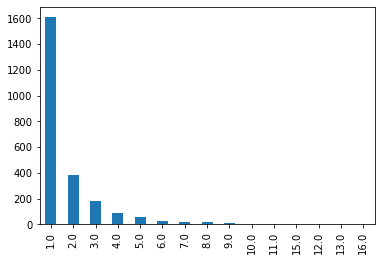

In [86]:
df_movies['season'].value_counts().plot.bar()

Khong có gì bất thường ở season, đa số phim chỉ có 1 mùa và số lượng phim giảm dần khi càng nhiều mùa. Có thể khá ít bộ phim đủ lợi nhuận để làm tiếp các mùa sau.

## Title 

Việc tách tên phim bằng dấu : có thể hữu ích trong việc tìm các phim liên quan. Chẳng hạn dòng phim Transformers thường có tên phim là `Transformer:<tên của tập phim>`. Bằng cách tách được tên phim như vậy chúng ta có thể recommend các tập khác nhau của một phim.

In [113]:
df_movies['title_postfix']=df_movies['title'].apply(lambda x:x[x.find(":")+1:] if x.find(":")>=0 else np.nan)

In [112]:
df_movies['title_prefix']=df_movies['title'].apply(lambda x:x[:x.find(":")] if x.find(":")>=0 else x)

In [127]:
df_movies.title_prefix.value_counts()[df_movies.title_prefix.value_counts()>4]

NOVA                              19
Monster High                      13
True                              10
Trailer Park Boys                  9
Krish Trish and Baltiboy           8
ReMastered                         8
Kevin Hart                         8
Jeff Dunham                        7
Dragons                            6
My Little Pony Equestria Girls     5
Katt Williams                      5
Barbie                             5
Little Singham                     5
Bill Burr                          5
Iliza Shlesinger                   5
Star Trek                          5
Jim Gaffigan                       5
Super Monsters                     5
Transformers                       5
Bill Hicks                         5
Name: title_prefix, dtype: int64